First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2     NaN
1           4.9          3.0           1.4          0.2     NaN
2           4.7          3.2           1.3          0.2     NaN
3           4.6          3.1           1.5          0.2     NaN
4           5.0          3.6           1.4          0.2     NaN

Dataset statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Class distribution:
Serie

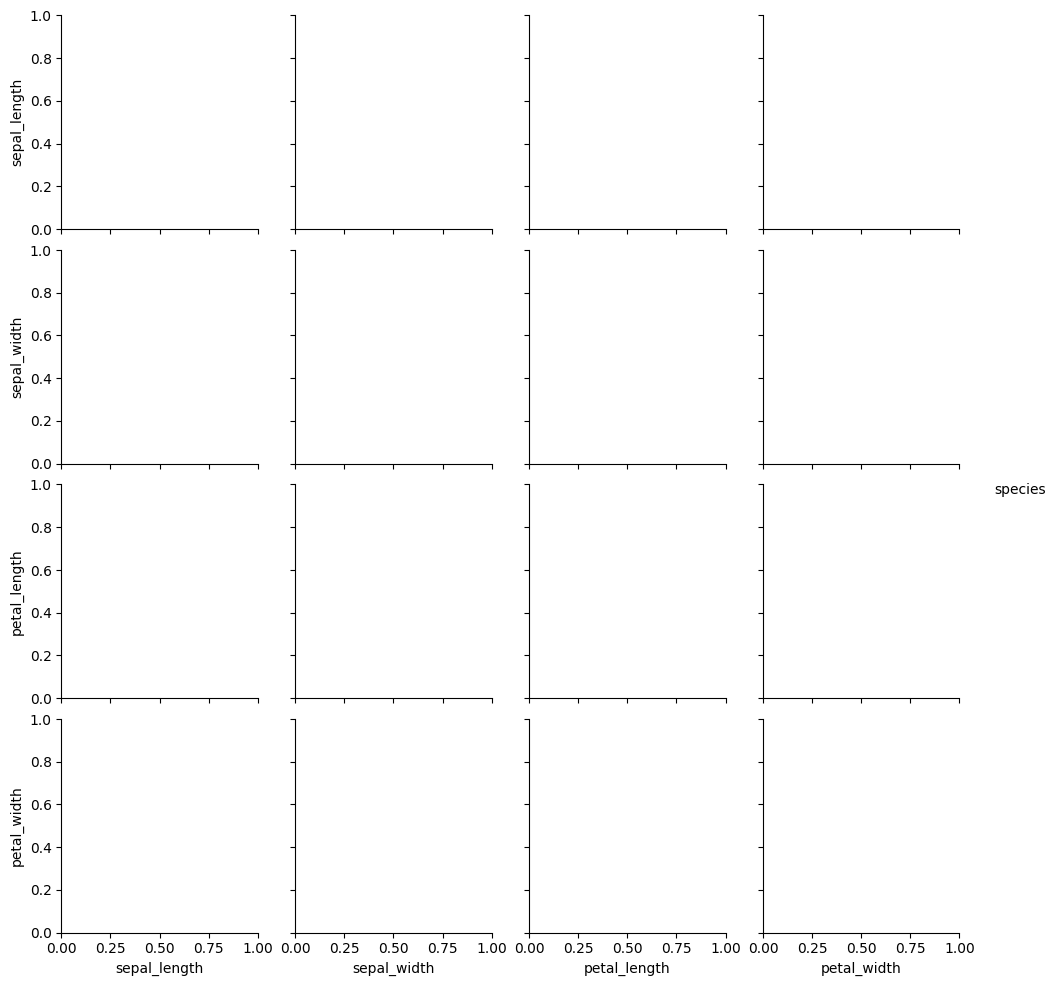


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



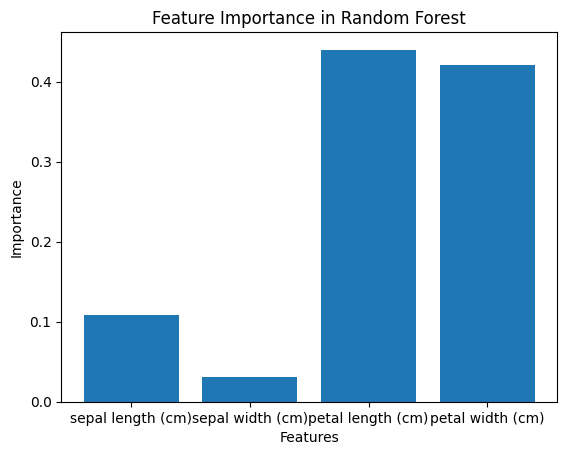

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


file_path = ('/kaggle/input/iris-flower-datasheet')
data = pd.read_csv('/kaggle/input/iris-flower-datasheet/IRIS.csv')

data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset statistics:")
print(data.describe())
print("\nClass distribution:")
print(data['species'].value_counts())


sns.pairplot(data, hue='species')
plt.show()

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



feature_importances = clf.feature_importances_
plt.bar(iris.feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()
